# Multiple Linear Regression by Ninh Nguyen



Multiple Linear Regression uses two or more variables to make predictions about another variable. <br>

Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values. <br>

We can use scikit-learn’s LinearRegression() to perform multiple linear regression. Residual Analysis is used to evaluate the regression model’s accuracy. In other words, it’s used to see if the model has learned the coefficients correctly.c <br>
    
Scikit-learn’s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction. The best score is 1.0. <br>


### StreetEasy Dataset

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

    rental_id: rental ID
    rent: price of rent in dollars
    bedrooms: number of bedrooms
    bathrooms: number of bathrooms
    size_sqft: size in square feet
    min_to_subway: distance from subway station in minutes
    floor: floor number
    building_age_yrs: building’s age in years
    no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
    has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
    has_washer_dryer: does it have washer/dryer in unit? (0/1)
    has_doorman: does it have a doorman? (0/1)
    has_elevator: does it have an elevator? (0/1)
    has_dishwasher: does it have a dishwasher (0/1)
    has_patio: does it have a patio? (0/1)
    has_gym: does the building have a gym? (0/1)
    neighborhood: (ex: Greenpoint)
    borough: (ex: Brooklyn)

The dataset:

    manhattan.csv
    brooklyn.csv
    queens.csv


First, pick a borough out of the three (Manhattan, Brooklyn, and Queens) that you are most interested in!

We are going to import the dataset and store it in a variable called df.

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [110]:
df = pd.read_csv('manhattan.csv')
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [111]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


Training Set vs. Test Set

As with most machine learning algorithms, we have to split our dataset into:

    Training set: the data used to fit the model
    Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)


Create a DataFrame x that selects the following columns from the main df DataFrame:

    'bedrooms'
    'bathrooms'
    'size_sqft'
    'min_to_subway'
    'floor'
    'building_age_yrs'
    'no_fee'
    'has_roofdeck'
    'has_washer_dryer'
    'has_doorman'
    'has_elevator'
    'has_dishwasher'
    'has_patio'
    'has_gym'

Create a DataFrame y that selects the rent column from the main df DataFrame.

These are the columns we want to use for our regression model.


In [112]:
streeteasy = pd.DataFrame(df)
streeteasy

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [113]:
x = streeteasy[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
x

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [114]:
y = streeteasy[['rent']]
y

,rent
0,2550
1,11500
2,4500
3,4795
4,17500
...,...
3534,4210
3535,6675
3536,1699
3537,3475


Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:

    x_train
    x_test
    y_train
    y_test

Set the random_state to 6

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 6)
x_train, x_test, y_train, y_test

(      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
 605        0.0          1        615              2   38.0                38   
 3165       2.0          2       1231              2   20.0                16   
 1302       2.0          2       1500              2   23.0                90   
 2123       3.0          2       1825             12   20.0                26   
 585        1.0          1        900              2    3.0                52   
 ...        ...        ...        ...            ...    ...               ...   
 618        0.0          1        470              3    3.0                59   
 2004       1.0          1        657              1   12.0                29   
 227        1.0          1        500              3    2.0               106   
 2761       0.0          1        578              4   22.0                47   
 2954       4.0          3       2127              4   14.0                10   
 
       no_fee  has_roofdec

Let’s take a look at the shapes of x_train, x_test, y_train, and y_test to see we got the proportion we wanted.

We have 14 features that we’re looking for for each apartment, and 1 label we’re looking for for each apartment.


In [116]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


import LinearRegression from scikit-learn’s linear_model module.

Create a Linear Regression model and call it mlr.

Fit the model using x_train and y_train

In [117]:
mlr = LinearRegression()
mlr

LinearRegression()

In [118]:
mlr.fit(x_train,y_train)

LinearRegression()

Use the model to predict y-values from x_test. Store the predictions in a variable called y_predict.

Now we have:

    x_test
    x_train
    y_test
    y_train
    and y_predict!



In [119]:
y_predict = mlr.predict(x_test)
y_predict

array([[ 3206.74211706],
       [ 3847.14817924],
       [ 4425.78377303],
       [ 2825.53009497],
       [ 5841.3080071 ],
       [ 2621.98757614],
       [ 3892.22170587],
       [ 3625.85842968],
       [ 5926.86373978],
       [ 7615.48640874],
       [ 9677.61737054],
       [ 6950.18653716],
       [ 3561.76885285],
       [11635.75018584],
       [ 4689.68372648],
       [ 2869.91499472],
       [ 8102.36092105],
       [ 3267.4344105 ],
       [ 2876.71427783],
       [ 8338.74246474],
       [ 7730.9863434 ],
       [ 3722.39369082],
       [ 1935.6987123 ],
       [ 4940.41662206],
       [11565.3210794 ],
       [ 6222.70579085],
       [ 4502.49541311],
       [ 2276.38493743],
       [ 2451.52625891],
       [ 5517.67306166],
       [ 2288.09313982],
       [ 2759.33450117],
       [ 2490.67950573],
       [ 2171.53901411],
       [ 3123.51788326],
       [ 4867.17476808],
       [ 4176.58123485],
       [ 4478.87757589],
       [ 6800.52311835],
       [ 4457.47371912],


To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn!

Or if you reside in New York, plug in your own apartment’s values and see if you are over or underpaying!


This is a 1BR/1Bath apartment that is 620 ft².<br>

Features 	Sonny’s Apartment<br>
bedrooms - 1<br>
bathrooms - 1<br>
size_sqft - 620 ft²<br>
min_to_subway - 16 min<br>
floor - 1<br>
building_age_yrs - 98 (built in 1920)<br>
no_fee - 1<br>
has_roofdeck - 0<br>
has_washer_dryer - Yas<br>
has_doorman - 0<br>
has_elevator - 0<br>
has_dishwasher - 1<br>
has_patio - 1<br>
has_gym - 0<br>

In [120]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
 
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Create a 2D scatter plot using y_test and y_predict.

The x-axis should represent actual rent prices and the y-axis should represent predicted rent prices.


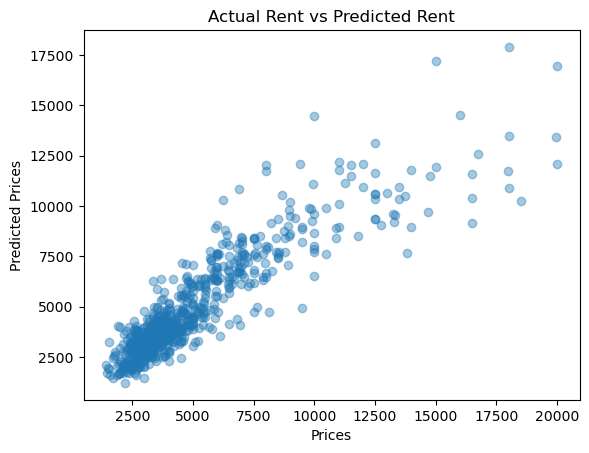

In [121]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.title('Actual Rent vs Predicted Rent')
plt.ylabel("Predicted Prices")
plt.xlabel('Prices')
plt.show()

In [122]:
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

In our Manhattan model, we used 14 variables, so there are 14 coefficients:


    bedrooms - number of bedrooms
    bathrooms - number of bathrooms
    size_sqft - size in square feet
    min_to_subway - distance from subway station in minutes
    floor - floor number
    building_age_yrs - building’s age in years
    no_fee - has no broker fee (0 for fee, 1 for no fee)
    has_roofdeck - has roof deck (0 for no, 1 for yes)
    has_washer_dryer - has in-unit washer/dryer (0/1)
    has_doorman - has doorman (0/1)
    has_elevator - has elevator (0/1)
    has_dishwasher - has dishwasher (0/1)
    has_patio - has patio (0/1)
    has_gym - has gym (0/1)

To see if there are any features that don’t affect price linearly, let’s graph the different features against "rent".

Interpreting graphs

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship. Here are two graphs indicating positive and negative linear relationships:

Positive and Negative Linear Relationships

Create a scatterplot of size_sqft and rent:

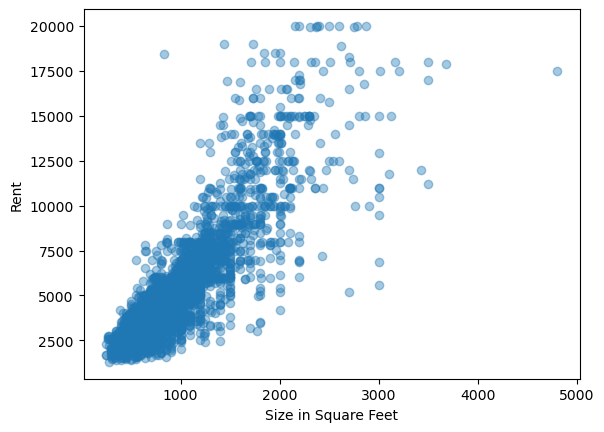

In [123]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel("Size in Square Feet")
plt.ylabel("Rent")
plt.show()

When using the Pandas library, double square brackets will output a DataFrame and single square brackets will output a Series.

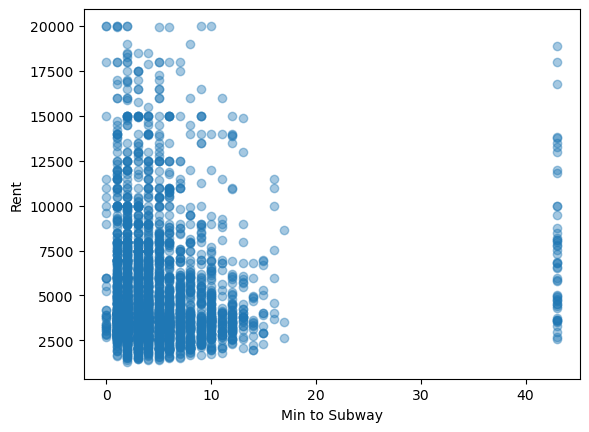

In [124]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.xlabel("Min to Subway")
plt.ylabel("Rent")
plt.show()

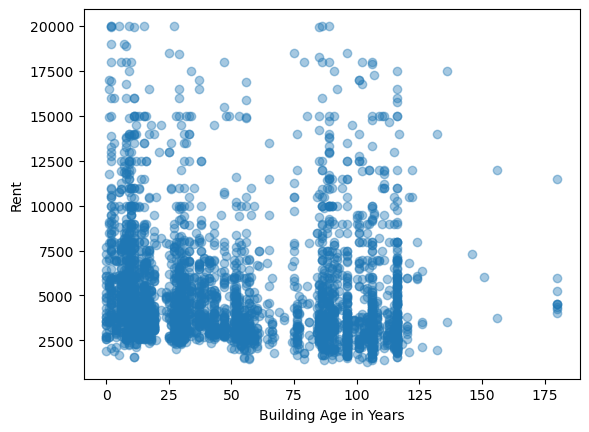

In [125]:
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.xlabel("Building Age in Years")
plt.ylabel("Rent")
plt.show()

Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set.

In [126]:
print("Train score:")
print(mlr.score(x_train, y_train))

Train score:
0.7725460559817883


In [127]:
print("Test score:")
print(mlr.score(x_test, y_test))

Test score:
0.8050371975357635


For Manhattan, the scores returned:

Train score:
0.7725460559817883

Test score:
0.8050371975357635


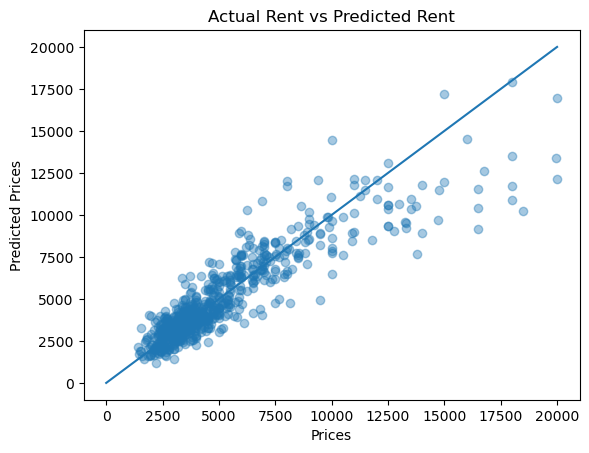

In [128]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.plot(range(20000), range(20000))
plt.title('Actual Rent vs Predicted Rent')
plt.ylabel("Predicted Prices")
plt.xlabel('Prices')
plt.show()

Print the coefficients again to see which ones are strongest.

In [129]:
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


Currently the x should look something like:

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

Remove some of the features that don’t have strong correlations and see if your scores improved!